In [2]:
from data_science_tools_for_pendigits_rough_paths import *
import iisignature
from scipy.stats import norm
from math import sqrt

In [3]:
a = np.random.rand(10, 10)

In [6]:
import torch

In [9]:
a = torch.tensor(a)

In [10]:
1/a

tensor([[ 1.5341,  2.2244,  2.7835,  1.0915,  2.8153,  1.0486,  2.5514,  3.7651,
          1.7350,  1.0088],
        [ 1.3314,  1.1525,  1.3973,  1.9863,  1.3362,  9.8616,  1.7619,  1.0106,
          4.2361,  3.2632],
        [ 1.3767,  1.3243,  1.7260,  6.4144,  8.8249,  1.7589,  2.0850,  1.8044,
          3.0297,  1.7957],
        [ 1.0745,  6.4041,  2.6986,  1.1297,  1.8317,  2.8514,  9.4536,  6.2036,
          1.0739,  2.0457],
        [95.3121,  3.8773,  1.0709,  1.1369,  1.2381,  1.7123,  1.3345,  1.1018,
          1.1340,  1.1907],
        [ 3.1601,  1.6807,  1.3223,  1.2560,  1.4422,  1.3672,  1.1100,  2.5960,
         20.8100,  2.7777],
        [ 1.6524,  1.6474,  1.8768,  1.0849,  3.3093,  1.5418,  5.3357,  1.0387,
          1.4035,  1.4442],
        [ 1.7359,  1.1151,  3.0696,  2.0632,  1.5008,  3.7459,  8.2151,  1.1429,
          1.5692,  1.0505],
        [ 6.2633,  1.0272,  2.9357,  1.5108,  1.4077, 23.3942, 20.1340,  1.9282,
          2.1086,  7.2917],
        [39.4273,  

In [6]:
def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    """

    x0 = np.asarray(x0)
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))
    if out is None:
        out = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=out)
    out += np.expand_dims(x0, axis=-1)
    return out

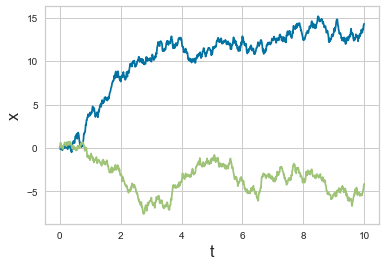

In [16]:
# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 1000
# Time step size
dt = T/N
# Number of realizations to generate.
m = 2
# Create an empty array to store the realizations.
x = np.empty((m,N+1))
# Initial values of x.
x[:, 0] = 0.

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = np.linspace(0.0, N*dt, N+1)
for k in range(m):
    plt.plot(t, x[k])
plt.xlabel('t', fontsize=16)
plt.ylabel('x', fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
depth = 1
np.sum([np.abs(x) for x in (iisignature.sig(x.T, depth) - tosig.stream2sig(x.T, depth)[1:])])

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [492]:
plt.rcParams['figure.figsize'] = (12, 8)

In [495]:
np.cumsum(np.random.rand(L, 1)).shape

(1000,)

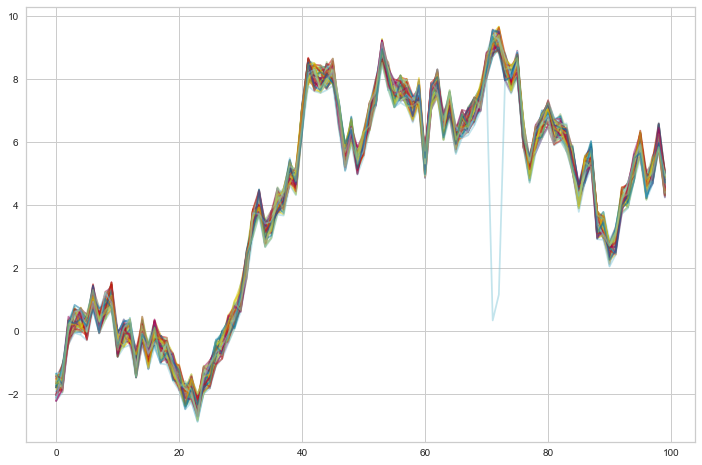

In [652]:
paths = []
L = 100
k = np.random.randint(0, L)
N = 50
jj = np.random.randint(0, N)

path = np.cumsum(np.random.randn(L, 1))

for j in range(N):
#     path = np.cumsum(np.random.rand(L, 1))
    if jj != j:
        path_mod = path + (np.random.rand(L, 1).reshape(L,))*0.9
        paths.append(path_mod)
    else:
        path_pert = np.array([x for x in path[:k-2]] + np.cumsum(np.random.rand(2,1)).tolist() + [x for x in path[k:]])
        paths.append(path_pert)

for p in paths:
    plt.plot(p, alpha=0.5)
plt.show()

In [653]:
# time_transformer = AddTime()
# paths_transformed = time_transformer.fit_transform(paths)

lead_lag_transformer = LeadLag()
paths_transformed = lead_lag_transformer.fit_transform(paths)

# Minimum depth to reach independence 

In [654]:
paths_dic = {}
for k in range(len(paths_transformed)):
    paths_except_one = paths_transformed[:k] + paths_transformed[k+1:]
    depth = 3
    sigs = np.array([iisignature.sig(p, depth).tolist() for p in paths_except_one])
    rank = np.linalg.matrix_rank(sigs)
    min_depth_for_indep = depth
    while rank < sigs.shape[0]:
        depth += 1
        sigs = np.array([iisignature.sig(p, depth).tolist() for p in paths_except_one])
        rank = np.linalg.matrix_rank(sigs)
        min_depth_for_indep = depth
    paths_dic['All Paths except path # {}'.format(k+1)] = 'independence reached at signature depth: {}'.format(min_depth_for_indep)

In [655]:
paths_dic

{'All Paths except path # 1': 'independence reached at signature depth: 6',
 'All Paths except path # 2': 'independence reached at signature depth: 6',
 'All Paths except path # 3': 'independence reached at signature depth: 6',
 'All Paths except path # 4': 'independence reached at signature depth: 6',
 'All Paths except path # 5': 'independence reached at signature depth: 6',
 'All Paths except path # 6': 'independence reached at signature depth: 6',
 'All Paths except path # 7': 'independence reached at signature depth: 6',
 'All Paths except path # 8': 'independence reached at signature depth: 6',
 'All Paths except path # 9': 'independence reached at signature depth: 6',
 'All Paths except path # 10': 'independence reached at signature depth: 6',
 'All Paths except path # 11': 'independence reached at signature depth: 6',
 'All Paths except path # 12': 'independence reached at signature depth: 6',
 'All Paths except path # 13': 'independence reached at signature depth: 6',
 'All Pa

# Deviation from  mean signature

In [665]:
depth = 2
width = 2

sigs = [iisignature.sig(p, depth) for p in paths_transformed]
sig_distance = lambda sig1, sig2: np.sum([x*x for x in (sig1-sig2)])**(1./2.)

In [666]:
distances = {}
ind1 = 1
ind2 = 1
for level in range(1, depth+1):
    ind2 += width**(level)
    sig_levels = []
    for sig in sigs:
        sig_level = sig[ind1:ind2]
        sig_levels.append(sig_level)
    mean_sig = np.mean(sig_levels, axis=0)
    dist_level = [sig_distance(s,mean_sig) for s in sig_levels]
    distances['level: {}'.format(level)] = np.array(dist_level)
    ind1 = ind2

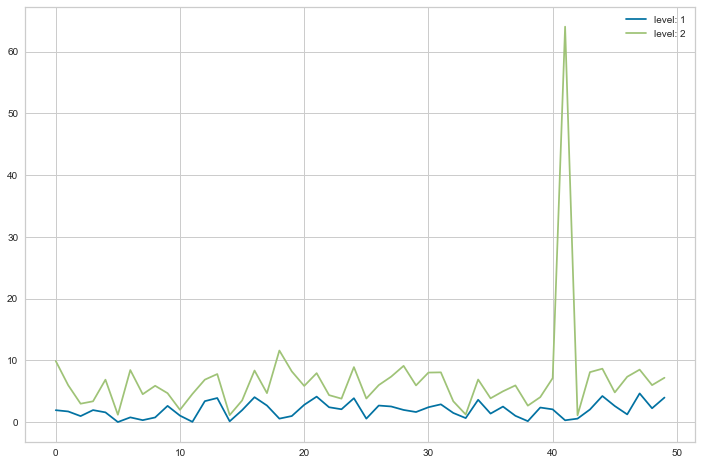

In [667]:
pd.DataFrame.from_dict(distances).plot()
plt.show()